In [1]:
import pandas as pd 

import plotly
import plotly.express as px

import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
# импорт DataFrame
churn_data = pd.read_csv('data/churn.csv')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Задание 9.1

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [3]:
# создание вспомогательного признака 'Loyality'
churn_data['Loyality'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Not loyal')

In [4]:
# создание сводных данных для построения графика
loyality=churn_data['Loyality'].value_counts()
loyality

Loyal        7963
Not loyal    2037
Name: Loyality, dtype: int64

In [5]:
# Построение графика

fig=px.pie(loyality,
    values = loyality,
    names = ['Loyal customers', 'Not loyal customers'],
    title = 'Соотношение лояльных и ушедших клиентов',
    color_discrete_sequence = px.colors.sequential.RdBu
)
fig.update_layout(title = {'font':dict(size=25), 'x':0.45})
fig.show();

Вывод: доля ушедших клиентов равняется примерно 1/5. Около 80% остаются лояльными к банку клиентами. 

## Задание 9.2

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [6]:
# ограничение
mask=churn_data['Balance'] > 2500

In [7]:
# Делаем объект типа Series для построения графика
balance = churn_data[mask]['Balance']
balance.min() # проверяем минимум 

3768.69

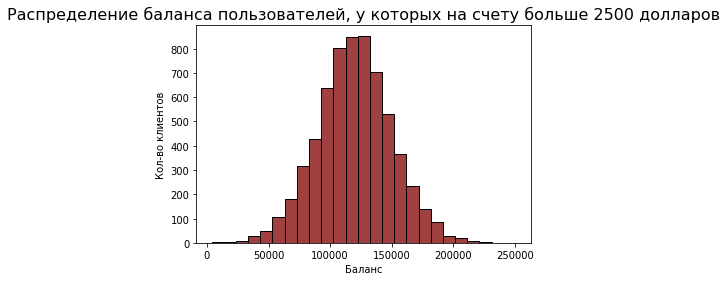

In [8]:
# Построение графика

fig2 = sns.histplot(
    data=balance,
    bins=25,
    color='maroon'
    )
fig2.set_title('Распределение баланса пользователей, у которых на счету больше 2500 долларов', fontsize=16)
fig2.set_xlabel('Баланс')
fig2.set_ylabel('Кол-во клиентов')
;
fig2;

Вывод: Больше всего клиентов с балансом от 100тыс.дол. до 140тыс.дол. Более чем у 1600 клиентов баланс от 110 до 130 тыс.дол.
До 120 тыс.руб. соотношение кол-ва клиентов и размера боланса увеличиается прямо пропорционально, после 120 тыс.руб. зависимость кол-ва клиентов от размера портфеля - обратная. 

### Задание 9.3

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [9]:
# данные для графика
data_o=churn_data.groupby(['Loyality'], as_index=False)[['Balance']].sum()

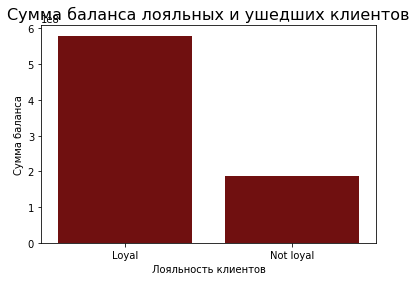

In [10]:
# построение графика

fig3 = sns.barplot(
    data = data_o,
    x = 'Loyality',
    y = 'Balance',
    color='maroon'

)

fig3.set_title('Сумма баланса лояльных и ушедших клиентов', fontsize=16);
fig3.set_ylabel('Сумма баланса')
fig3.set_xlabel('Лояльность клиентов');

Вывод: Сумма баланса лояльных клиентов примерно около 600 млн.дол., а сумма баланса ушедших клиентов примерно около 200 млн.руб., т.е. в 3 раза меньше. Это может быть связано с тем, что ушедшие клиенты нашли более выгодные условия хранения своих денежных средств у других банков.

### Задание 9.4

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

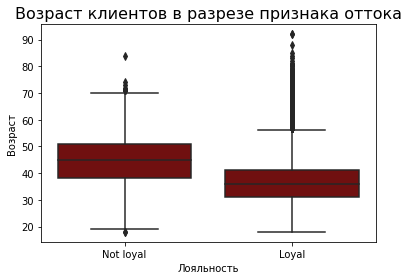

In [11]:
# построение графика

fig4 = sns.boxplot(
    data = churn_data,
    x = 'Loyality',
    y = 'Age',
    color='maroon'

)

fig4.set_title('Возраст клиентов в разрезе признака оттока', fontsize=16);
fig4.set_xlabel('Лояльность')
fig4.set_ylabel('Возраст');

Вывод: заметим, что примерно от 40 лет клиенты начинают уходить из банка. Банку следует обратить особое внимание на возрастную группу 40-50 лет, возможно разработать льготную программу для этой группы. При этом не следует упускать из виду группу от 20 до 30 и возможно также разработать молодежную льготную программу, чтобы увеличить разброс возрастных групп клиентов. 

### Задание 9.5

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

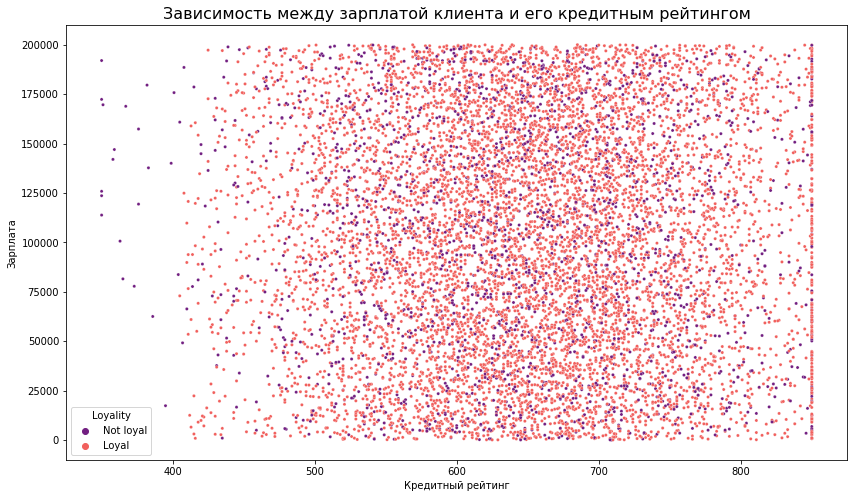

In [12]:
# построение графика

plt.figure(figsize=(14, 8))
fig5 = sns.scatterplot(data=churn_data,
                         x='CreditScore',
                         y='EstimatedSalary',
                         hue='Loyality',
                         s=10,
                         palette="magma"
)
fig5.set_title('Зависимость между зарплатой клиента и его кредитным рейтингом', fontsize=16);
fig5.set_xlabel('Кредитный рейтинг')
fig5.set_ylabel('Зарплата');

Вывод: Зависимости между зарплатой клиента и его кредитным рейтингом нет. Бывают клиенты как с высокой зарплатой и низким кредитным рейтигом, так и наоборот, клиенты с низкой зарплатой имеют высокий кредитный рейтинг.

### Задание 9.6

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [13]:
# ограничение (1 - ушедшие клиенты)
mask1 = churn_data['Exited'] == 1

In [14]:
# сводные данные для графика

gender = churn_data[mask1]['Gender'].value_counts()
gender

Female    1139
Male       898
Name: Gender, dtype: int64

In [15]:
# построение графика

fig6=px.pie(gender,
    values = gender,
    names=['Female', 'Male'],
    title='Ушедшие клиенты в разрезе признака пола',
    color_discrete_sequence = px.colors.sequential.RdBu
)

fig6.update_layout(title = {'font':dict(size=25), 'x':0.5})
fig6

Вывод: Чаще уходят женщины, однако разница невысока, примерно 5%. 

### Задание 9.7

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [16]:
# сводные данные для графика
service=churn_data.groupby(['Loyality'], as_index=False)[['NumOfProducts']].value_counts()
service

,Loyality,NumOfProducts,count
0,Loyal,2,4242
1,Loyal,1,3675
2,Loyal,3,46
3,Not loyal,1,1409
4,Not loyal,2,348
5,Not loyal,3,220
6,Not loyal,4,60


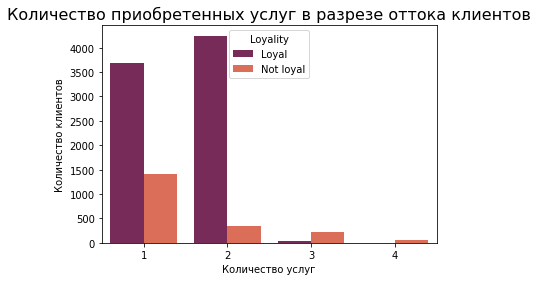

In [17]:
# построение графика

fig7=sns.barplot(
    data=service,
    x='NumOfProducts',
    y='count',
    hue='Loyality',
    palette="rocket"
     
)
fig7.set_title('Количество приобретенных услуг в разрезе оттока клиентов', fontsize=16);
fig7.set_xlabel('Количество услуг')
fig7.set_ylabel('Количество клиентов');

Вывод: Большинство ушедших клиентов воспользовались только одной услугой банка. Чуть меньше клиентов воспользовались 2 или 3 услугами. Тех, кто пользовался 4-мя услугами банка, меньше всего. Самый высокий процент лояльности у тех клиентов, кто пользуется 1 или 2 услугами банков. Таким образом делаем вывод, что необходима программа лояльности для тех, кто пользуется одной услугой. 

### Задание 9.8

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [18]:
# создадим новый признак в таблице
churn_data['Activity']=churn_data['IsActiveMember'].apply(lambda x: 'Active' if x == 1 else 'Not active')

In [19]:
# группировка данных для построения графика
activity = churn_data.groupby(['Loyality', 'Activity'], as_index=False).count()
activity

,Loyality,Activity,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Loyal,Active,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416
1,Loyal,Not active,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
2,Not loyal,Active,735,735,735,735,735,735,735,735,735,735,735,735,735,735
3,Not loyal,Not active,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302


In [20]:
# построение графика
fig8=px.bar(
    data_frame=activity,
    x='Activity',
    y='RowNumber',
    color='Loyality',
    height=400,
    width=600,
    title='Статус активности клиентов',
    color_discrete_sequence = px.colors.sequential.RdBu
    
)
fig8.update_layout(title = {'font':dict(size=25), 'x':0.5},
                xaxis_title="Статус активности",
                yaxis_title="Количество клиентов",)
fig8

Вывод: Доля клиентов с активным статусом и доля клиентов с неактивным статусом распределились примерно поровну. Однако среди неактивных клиентов доля ушедших клиентов больше, чем доля ушедших клиентом с активным статусом. Нужно запустить программу, которая заинтесует неактивных клиентов получить статус активности. 

### Задание 9.9

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [21]:
# подготавливаем данные для построения графика
ratio=churn_data.groupby(['Geography'] , as_index=False).mean()
ratio

,Geography,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
1,Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
2,Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [22]:
# построение графика

fig9 = px.choropleth(
    data_frame=ratio,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    title='Распределение ушедших клиентов по странам',
    width=1000,
    height=500,
    color_continuous_scale = px.colors.sequential.RdBu,
    labels={'Exited':'Ушедшие клиенты'}
)
fig9.update_layout(title = {'font':dict(size=25), 'x':0.45})
fig9

Вывод: Самая высокая доля ушедших клиентов в Германии. Возможно на территории страны присутствует другой банк-конкурент, у которого условия гораздо выгоднее, чем у нашего. 

### Задание 9.10

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [23]:
#  функция для категориального типа 

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [24]:
# Создание категориального признака 'CreditScoreCat'

churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat']=churn_data['CreditScoreCat'].astype('category')


In [25]:
# Создание сводной таблицы для построения графика

table = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0)
table

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


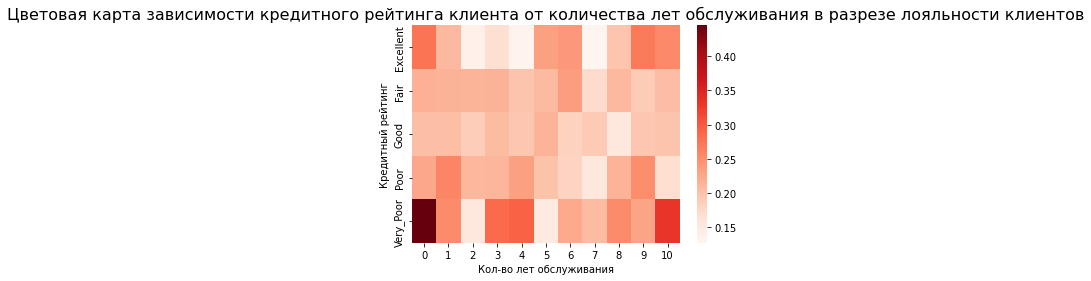

In [26]:
# Построение графика
fig10=sns.heatmap(data=table, cmap='Reds')

fig10.set_title('Цветовая карта зависимости кредитного рейтинга клиента от количества лет обслуживания в разрезе лояльности клиентов', fontsize=16)
fig10.set_xlabel('Кол-во лет обслуживания')
fig10.set_ylabel('Кредитный рейтинг');

Вывод: Больше всего ушедших клиентов с низким рейтингом на началом этапе обслуживания в банке. Это может быть обусловлено тем, что таким клиентам возможно не понравились условия сотрудничества в нашем банке. Более того, чем выше кредитный рейтинг клиента, тем меньше потерь. Но все же именно клиенты с очень плохим кредитным рейтингом непредсказуемы в своей лояльности  к банку. 